In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
data = pd.read_csv('wdbc.csv')
data.head()

,ID number,Diagnosis mean,radius mean,texture mean,perimeter mean,area mean,smoothness mean,compactness mean,concavity mean,concave points mean,...,radius worst,texture worst,perimeter worst,area worst,smoothness worst,compactness worst,concavity worst,concave points worst,symmetry worst,fractal dimension worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID number                         569 non-null    int64  
 1   Diagnosis mean                    569 non-null    object 
 2   radius mean                       569 non-null    float64
 3   texture mean                      569 non-null    float64
 4   perimeter mean                    569 non-null    float64
 5   area mean                         569 non-null    float64
 6   smoothness mean                   569 non-null    float64
 7   compactness mean                  569 non-null    float64
 8   concavity mean                    569 non-null    float64
 9   concave points mean               569 non-null    float64
 10  symmetry mean                     569 non-null    float64
 11  fractal dimension mean            569 non-null    float64
 12  radius s

In [4]:
data.describe()

,ID number,radius mean,texture mean,perimeter mean,area mean,smoothness mean,compactness mean,concavity mean,concave points mean,symmetry mean,...,radius worst,texture worst,perimeter worst,area worst,smoothness worst,compactness worst,concavity worst,concave points worst,symmetry worst,fractal dimension worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
data.drop(['ID number'], axis=1, inplace=True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Diagnosis mean', axis=1), data['Diagnosis mean'], test_size=0.3, random_state=2)

In [7]:
sc = StandardScaler()

In [8]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## Apply KNN for Original Dataset

In [9]:
#neighbors = []
cv_scores = []
  
for k in range(1, 31):
    #neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = knn.score(X_test_scaled, y_test)
    cv_scores.append(accuracy)

### Determining the best k

In [10]:
# determine the best value of k
best_k = cv_scores.index(max(cv_scores))
print("The best value of k is: ", best_k+1)

The best value of k is:  3


In [11]:
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train_scaled, y_train)
y_pred_knn = knn_classifier.predict(X_test_scaled)

In [12]:
print('K Nearest Neighbour Algorithm Accuracy is {0:.2g}%'.format(accuracy_score(y_test, y_pred_knn)*100))
print('...'*10,f'\n')

print('Classification Report for K Nearest Neighbour:')
print('...'*10)
cr_knn =classification_report(y_test, y_pred_knn)
print(cr_knn)

K Nearest Neighbour Algorithm Accuracy is 98%
.............................. 

Classification Report for K Nearest Neighbour:
..............................
              precision    recall  f1-score   support

           B       0.97      1.00      0.99       104
           M       1.00      0.96      0.98        67

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



Confusion Matrix for K Nearest Neighbour Algorithm
.............................................


<AxesSubplot: >

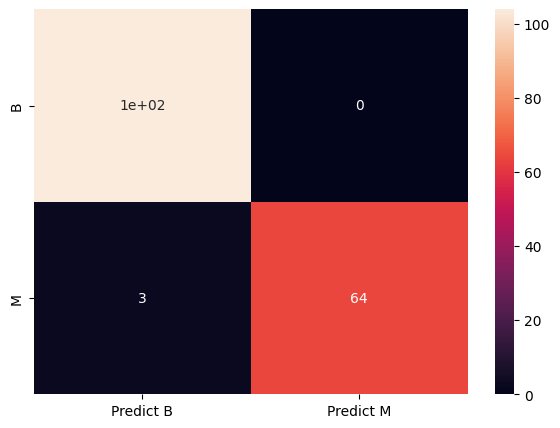

In [13]:
cm_knn =confusion_matrix(y_test, y_pred_knn, labels=['B', 'M'])
print('Confusion Matrix for K Nearest Neighbour Algorithm')
print('...'*15)
df_cm_knn = pd.DataFrame(cm_knn, index=[i for i in ['B', 'M']], columns=[i for i in ['Predict B', 'Predict M']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm_knn, annot=True)

## Apply Decision Tree for Original Dataset

In [14]:
dt_classifier = DecisionTreeClassifier(random_state=1)

In [ ]:
dt_classifier.fit(X_train_scaled, y_train)

In [16]:
y_pred_dt = dt_classifier.predict(X_test_scaled)

In [17]:
print('Decision Tree Algorithm Accuracy is {0:.2g}%'.format(accuracy_score(y_test, y_pred_dt)*100))
print('...'*10,f'\n')

print('Classification Report for Decision Tree Algorithm:')
print('...'*10)
cr_dt =classification_report(y_test, y_pred_dt)
print(cr_dt)

Decision Tree Algorithm Accuracy is 92%
.............................. 

Classification Report for Decision Tree Algorithm:
..............................
              precision    recall  f1-score   support

           B       0.97      0.90      0.94       104
           M       0.86      0.96      0.91        67

    accuracy                           0.92       171
   macro avg       0.92      0.93      0.92       171
weighted avg       0.93      0.92      0.92       171



Confusion Matrix for Decision Tree Algorithm
.............................................


<AxesSubplot: >

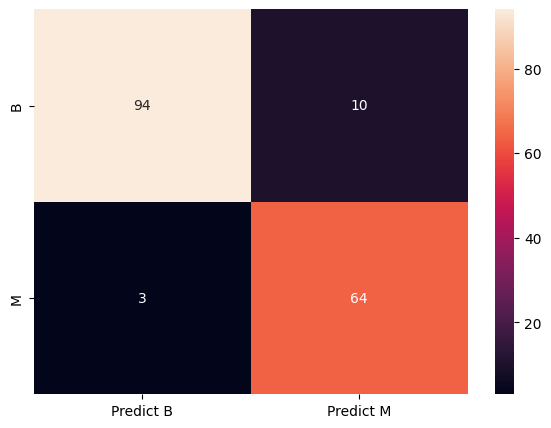

In [18]:
cm_dt =confusion_matrix(y_test, y_pred_dt, labels=['B', 'M'])
print('Confusion Matrix for Decision Tree Algorithm')
print('...'*15)
df_cm_dt = pd.DataFrame(cm_dt, index=[i for i in ['B', 'M']], columns=[i for i in ['Predict B', 'Predict M']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm_dt, annot=True)

## Apply Random Forest for Original Dataset

In [19]:
rf_classifier = RandomForestClassifier(random_state=1)

In [20]:
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=1)

In [21]:
y_pred_rf = rf_classifier.predict(X_test_scaled)

In [22]:
print('Random Forest Algorithm Accuracy is {0:.2g}%'.format(accuracy_score(y_test, y_pred_rf)*100))
print('...'*10,f'\n')

print('Classification Report for Random Forest Algorithm:')
print('...'*10)
cr_rf =classification_report(y_test, y_pred_rf)
print(cr_rf)

Random Forest Algorithm Accuracy is 95%
.............................. 

Classification Report for Random Forest Algorithm:
..............................
              precision    recall  f1-score   support

           B       0.96      0.96      0.96       104
           M       0.94      0.94      0.94        67

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



Confusion Matrix for Random Forest Algorithm
.............................................


<AxesSubplot: >

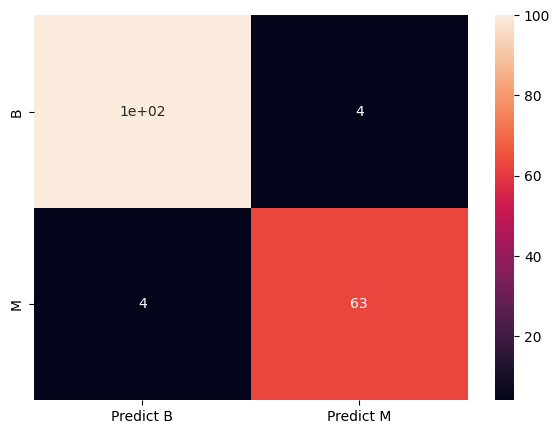

In [23]:
cm_rf =confusion_matrix(y_test, y_pred_rf, labels=['B', 'M'])
print('Confusion Matrix for Random Forest Algorithm')
print('...'*15)
df_cm_rf = pd.DataFrame(cm_rf, index=[i for i in ['B', 'M']], columns=[i for i in ['Predict B', 'Predict M']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm_rf,annot=True)

## Apply MLP for Original Dataset

In [24]:
mlp_classifier = MLPClassifier(max_iter=1000, alpha=0.1, random_state=2)

In [25]:
mlp_classifier.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0.1, max_iter=1000, random_state=2)

In [26]:
y_pred_mlp = mlp_classifier.predict(X_test_scaled)

In [27]:
print('MLP Algorithm Accuracy is {0:.2g}%'.format(accuracy_score(y_test, y_pred_mlp)*100))
print('...'*10,f'\n')

print('Classification Report for MLP Algorithm:')
print('...'*10)
cr_mlp = classification_report(y_test, y_pred_mlp)
print(cr_mlp)

MLP Algorithm Accuracy is 96%
.............................. 

Classification Report for MLP Algorithm:
..............................
              precision    recall  f1-score   support

           B       0.98      0.95      0.97       104
           M       0.93      0.97      0.95        67

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



Confusion Matrix for MLP Algorithm
.............................................


<AxesSubplot: >

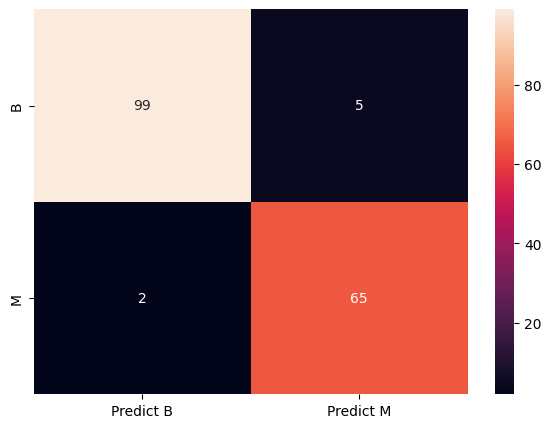

In [28]:
cm_mlp =confusion_matrix(y_test, y_pred_mlp, labels=['B', 'M'])
print('Confusion Matrix for MLP Algorithm')
print('...'*15)
df_cm_mlp = pd.DataFrame(cm_mlp, index=[i for i in ['B', 'M']], columns=[i for i in ['Predict B', 'Predict M']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm_mlp, annot=True)

## Apply SVM Model for Original Dataset

In [29]:
svm_classifier = SVC(random_state=1)
svm_classifier.fit(X_train_scaled, y_train)

SVC(random_state=1)

In [30]:
y_pred_svm = svm_classifier.predict(X_test_scaled)

In [31]:
print('SVM Algorithm Accuracy is {0:.2g}%'.format(accuracy_score(y_test, y_pred_svm)*100))
print('...'*10,f'\n')

print('Classification Report for SVM Algorithm:')
print('...'*10)
cr_svm = classification_report(y_test, y_pred_svm)
print(cr_svm)

SVM Algorithm Accuracy is 98%
.............................. 

Classification Report for SVM Algorithm:
..............................
              precision    recall  f1-score   support

           B       0.99      0.97      0.98       104
           M       0.96      0.99      0.97        67

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



Confusion Matrix for SVM Algorithm
.............................................


<AxesSubplot: >

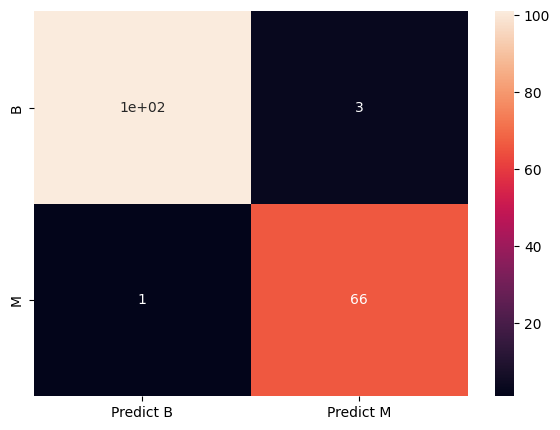

In [32]:
cm_svm =confusion_matrix(y_test, y_pred_svm, labels=['B', 'M'])
print('Confusion Matrix for SVM Algorithm')
print('...'*15)
df_cm_svm = pd.DataFrame(cm_svm, index=[i for i in ['B', 'M']], columns=[i for i in ['Predict B', 'Predict M']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm_svm, annot=True)

# Re-run the All algorithms after dimensionality reduction using PCA

#### Applying PCA

In [33]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

In [34]:
explained_variances = pca.explained_variance_ratio_
print('explained_variances: ',explained_variances)
print('sum variances: ', sum(explained_variances))

explained_variances:  [4.52324051e-01 1.85056086e-01 9.08323885e-02 6.52303856e-02
 5.37713005e-02 4.33991807e-02 2.41500607e-02 1.48302067e-02
 1.40170431e-02 1.11845234e-02 1.01941032e-02 8.27268745e-03
 6.37306850e-03 5.32496339e-03 2.93486300e-03 2.55755102e-03
 2.01498152e-03 1.69237958e-03 1.07808579e-03 1.04634378e-03
 8.84514905e-04 7.13643784e-04 6.69486849e-04 5.62632423e-04
 3.34563023e-04 2.57758808e-04 2.19707549e-04 5.01962672e-05
 1.83058540e-05 4.93764413e-06]
sum variances:  0.9999999999999999


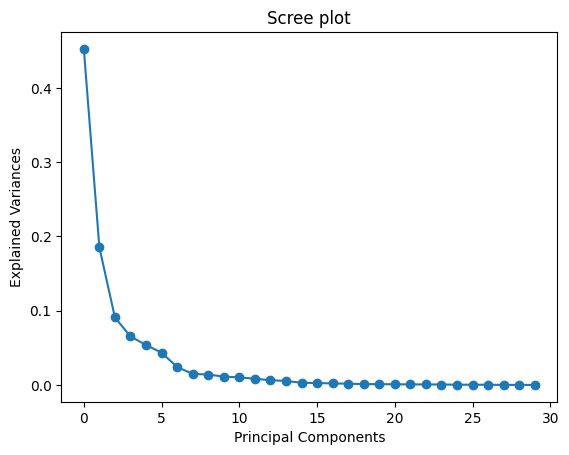

In [35]:
plt.plot(explained_variances, marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variances')
plt.title('Scree plot')
plt.show()

In [36]:
pca_new = PCA(n_components=7)
X_train_pca_new = pca_new.fit_transform(X_train_scaled)
X_test_pca_new = pca_new.transform(X_test_scaled)

In [37]:
explained_variances = pca_new.explained_variance_ratio_
print('explained_variances: ',explained_variances)
print('sum variances: ', sum(explained_variances))

explained_variances:  [0.45232405 0.18505609 0.09083239 0.06523039 0.0537713  0.04339918
 0.02415006]
sum variances:  0.9147634524345258


## Apply KNN after using PCA

In [38]:
knn_classifier.fit(X_train_pca_new, y_train)
y_pred_knn_pca = knn_classifier.predict(X_test_pca_new)

In [39]:
print('K Nearest Neighbour Accuracy After Applying PCA is {0:.2g}%'.format(accuracy_score(y_test, y_pred_knn_pca)*100))
print('...'*10,f'\n')

print('Classification Report After Applying PCA for K Nearest Neighbour:')
print('...'*10)
cr_knn_pca =classification_report(y_test, y_pred_knn_pca)
print(cr_knn_pca)

K Nearest Neighbour Accuracy After Applying PCA is 97%
.............................. 

Classification Report After Applying PCA for K Nearest Neighbour:
..............................
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       104
           M       0.98      0.94      0.96        67

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



Confusion Matrix for K Nearest Neighbour Algorithm After Applying PCA
.............................................


<AxesSubplot: >

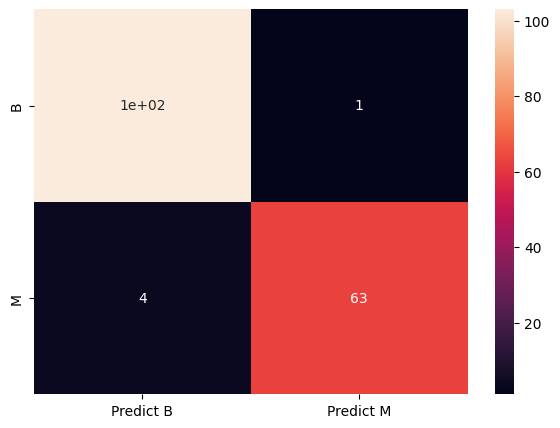

In [40]:
cm_knn_pca =confusion_matrix(y_test, y_pred_knn_pca, labels=['B', 'M'])
print('Confusion Matrix for K Nearest Neighbour Algorithm After Applying PCA')
print('...'*15)
df_cm_knn_pca = pd.DataFrame(cm_knn_pca, index=[i for i in ['B', 'M']], columns=[i for i in ['Predict B', 'Predict M']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm_knn_pca, annot=True)

## Apply Decision Tree after using PCA

In [41]:
dt_classifier.fit(X_train_pca_new, y_train)

DecisionTreeClassifier(random_state=1)

In [42]:
y_pred_dt_pca = dt_classifier.predict(X_test_pca_new)

In [43]:
print('Decision Tree Algorithm Accuracy After Applying PCA is {0:.2g}%'.format(accuracy_score(y_test, y_pred_dt_pca)*100))
print('...'*10,f'\n')

print('Classification Report for Decision Tree Algorithm After Applying PCA:')
print('...'*10)
cr_dt_pca =classification_report(y_test, y_pred_dt_pca)
print(cr_dt_pca)

Decision Tree Algorithm Accuracy After Applying PCA is 94%
.............................. 

Classification Report for Decision Tree Algorithm After Applying PCA:
..............................
              precision    recall  f1-score   support

           B       0.95      0.95      0.95       104
           M       0.93      0.93      0.93        67

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



Confusion Matrix for Decision Tree Algorithm After Applying PCA
.............................................


<AxesSubplot: >

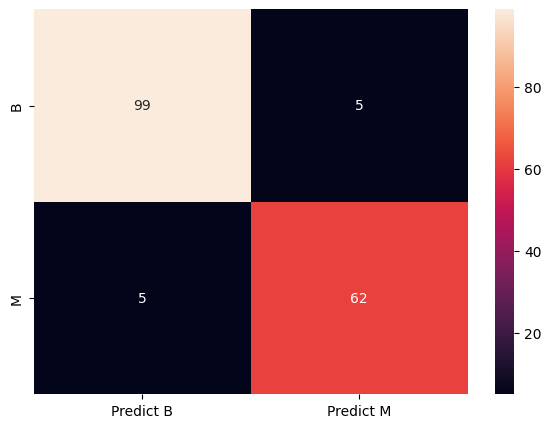

In [44]:
cm_dt_pca =confusion_matrix(y_test, y_pred_dt_pca, labels=['B', 'M'])
print('Confusion Matrix for Decision Tree Algorithm After Applying PCA')
print('...'*15)
df_cm_dt_pca = pd.DataFrame(cm_dt_pca, index=[i for i in ['B', 'M']], columns=[i for i in ['Predict B', 'Predict M']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm_dt_pca, annot=True)

## Apply Random Forest after using PCA

In [45]:
rf_classifier.fit(X_train_pca_new, y_train)

RandomForestClassifier(random_state=1)

In [46]:
y_pred_rf_pca = rf_classifier.predict(X_test_pca_new)

In [47]:
print('Random Forest Algorithm Accuracy After Applying PCA is {0:.2g}%'.format(accuracy_score(y_test, y_pred_rf_pca)*100))
print('...'*10,f'\n')

print('Classification Report for Random Forest Algorithm After Applying PCA:')
print('...'*10)
cr_rf_pca =classification_report(y_test, y_pred_rf_pca)
print(cr_rf_pca)

Random Forest Algorithm Accuracy After Applying PCA is 96%
.............................. 

Classification Report for Random Forest Algorithm After Applying PCA:
..............................
              precision    recall  f1-score   support

           B       0.96      0.98      0.97       104
           M       0.97      0.94      0.95        67

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



Confusion Matrix for Random Forest Algorithm After Applying PCA
.............................................


<AxesSubplot: >

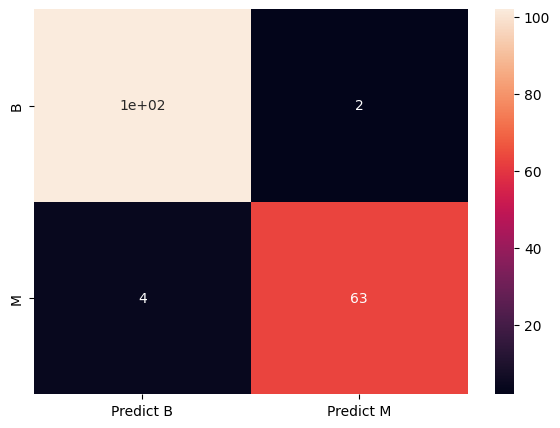

In [48]:
cm_rf_pca =confusion_matrix(y_test, y_pred_rf_pca, labels=['B', 'M'])
print('Confusion Matrix for Random Forest Algorithm After Applying PCA')
print('...'*15)
df_cm_rf_pca = pd.DataFrame(cm_rf_pca, index=[i for i in ['B', 'M']], columns=[i for i in ['Predict B', 'Predict M']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm_rf_pca,annot=True)

## Apply MLP after using PCA

In [49]:
mlp_classifier.fit(X_train_pca_new, y_train)

MLPClassifier(alpha=0.1, max_iter=1000, random_state=2)

In [50]:
y_pred_mlp_pca = mlp_classifier.predict(X_test_pca_new)

In [51]:
print('MLP Algorithm Accuracy After Applying PCA is {0:.2g}%'.format(accuracy_score(y_test, y_pred_mlp_pca)*100))
print('...'*10,f'\n')

print('Classification Report for MLP Algorithm After Applying PCA:')
print('...'*10)
cr_mlp_pca = classification_report(y_test, y_pred_mlp_pca)
print(cr_mlp_pca)

MLP Algorithm Accuracy After Applying PCA is 95%
.............................. 

Classification Report for MLP Algorithm After Applying PCA:
..............................
              precision    recall  f1-score   support

           B       0.97      0.94      0.96       104
           M       0.91      0.96      0.93        67

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



Confusion Matrix for MLP Algorithm After Applying PCA
.............................................


<AxesSubplot: >

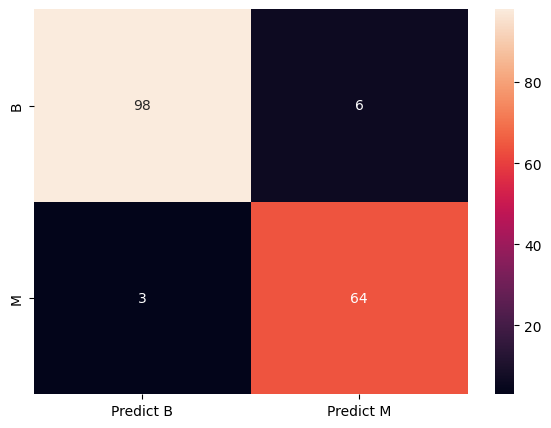

In [52]:
cm_mlp_pca =confusion_matrix(y_test, y_pred_mlp_pca, labels=['B', 'M'])
print('Confusion Matrix for MLP Algorithm After Applying PCA')
print('...'*15)
df_cm_mlp_pca = pd.DataFrame(cm_mlp_pca, index=[i for i in ['B', 'M']], columns=[i for i in ['Predict B', 'Predict M']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm_mlp_pca, annot=True)

## Apply SVM Model after using PCA

In [53]:
svm_classifier.fit(X_train_pca_new, y_train)

SVC(random_state=1)

In [54]:
y_pred_svm_pca = svm_classifier.predict(X_test_pca_new)

In [55]:
print('SVM Algorithm Accuracy After Applying PCA is {0:.2g}%'.format(accuracy_score(y_test, y_pred_svm_pca)*100))
print('...'*20,f'\n')

print('Classification Report for SVM Algorithm After Applying PCA:')
print('...'*20)
cr_svm_pca = classification_report(y_test, y_pred_svm_pca)
print(cr_svm_pca)

SVM Algorithm Accuracy After Applying PCA is 96%
............................................................ 

Classification Report for SVM Algorithm After Applying PCA:
............................................................
              precision    recall  f1-score   support

           B       0.98      0.96      0.97       104
           M       0.94      0.97      0.96        67

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.96       171



Confusion Matrix for SVM Algorithm After Applying PCA
.............................................


<AxesSubplot: >

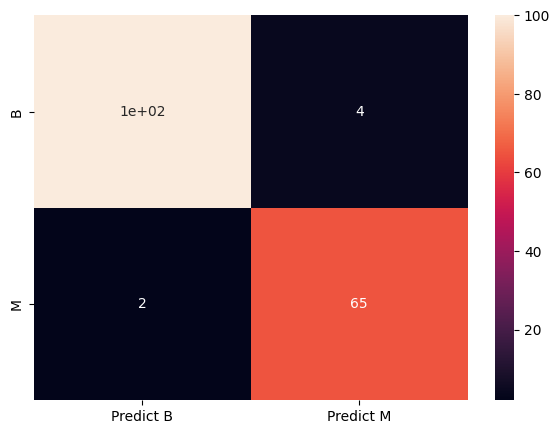

In [56]:
cm_svm_pca =confusion_matrix(y_test, y_pred_svm_pca, labels=['B', 'M'])
print('Confusion Matrix for SVM Algorithm After Applying PCA')
print('...'*15)
df_cm_svm_pca = pd.DataFrame(cm_svm_pca, index=[i for i in ['B', 'M']], columns=[i for i in ['Predict B', 'Predict M']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm_svm_pca, annot=True)

# Re-run the All algorithms after using LDA

#### Applying LDA

In [57]:
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

## Apply KNN after using LDA

In [58]:
knn_classifier.fit(X_train_lda, y_train)
y_pred_knn_lda = knn_classifier.predict(X_test_lda)

In [59]:
print('K Nearest Neighbour Accuracy After Applying LDA is {0:.2g}%'.format(accuracy_score(y_test, y_pred_knn_lda)*100))
print('...'*25,f'\n')

print('Classification Report After Applying LDA for K Nearest Neighbour:')
print('...'*25)
cr_knn_lda =classification_report(y_test, y_pred_knn_lda)
print(cr_knn_lda)

K Nearest Neighbour Accuracy After Applying LDA is 95%
........................................................................... 

Classification Report After Applying LDA for K Nearest Neighbour:
...........................................................................
              precision    recall  f1-score   support

           B       0.97      0.95      0.96       104
           M       0.93      0.96      0.94        67

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



Confusion Matrix for K Nearest Neighbour Algorithm After Applying LDA
...........................................................................


<AxesSubplot: >

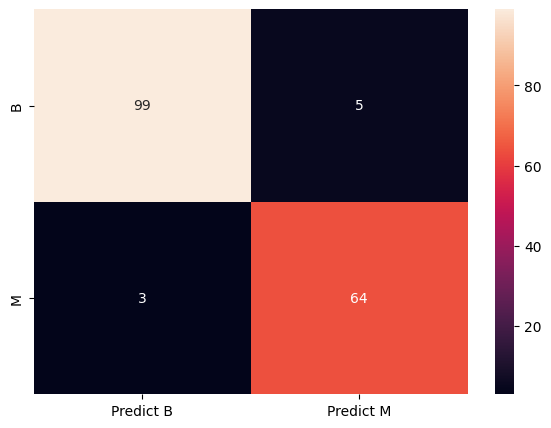

In [60]:
cm_knn_lda =confusion_matrix(y_test, y_pred_knn_lda, labels=['B', 'M'])
print('Confusion Matrix for K Nearest Neighbour Algorithm After Applying LDA')
print('...'*25)
df_cm_knn_lda = pd.DataFrame(cm_knn_lda, index=[i for i in ['B', 'M']], columns=[i for i in ['Predict B', 'Predict M']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm_knn_lda, annot=True)

## Apply Decision Tree after using LDA

In [61]:
dt_classifier.fit(X_train_lda, y_train)

DecisionTreeClassifier(random_state=1)

In [62]:
y_pred_dt_lda = dt_classifier.predict(X_test_lda)

In [63]:
print('Decision Tree Algorithm Accuracy After Applying LDA is {0:.2g}%'.format(accuracy_score(y_test, y_pred_dt_lda)*100))
print('...'*25,f'\n')

print('Classification Report for Decision Tree Algorithm After Applying LDA:')
print('...'*25)
cr_dt_lda =classification_report(y_test, y_pred_dt_lda)
print(cr_dt_lda)

Decision Tree Algorithm Accuracy After Applying LDA is 94%
........................................................................... 

Classification Report for Decision Tree Algorithm After Applying LDA:
...........................................................................
              precision    recall  f1-score   support

           B       0.96      0.93      0.95       104
           M       0.90      0.94      0.92        67

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



Confusion Matrix for Decision Tree Algorithm After Applying LDA
...........................................................................


<AxesSubplot: >

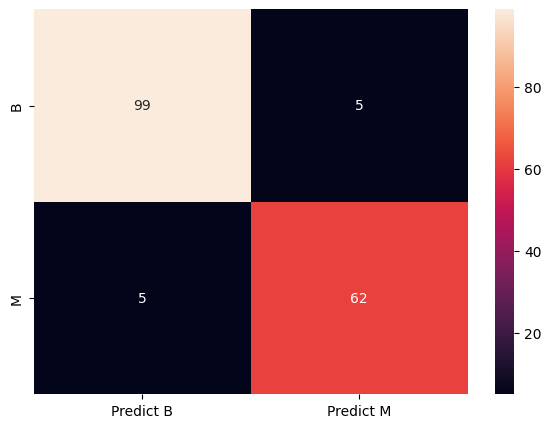

In [64]:
cm_dt_pca =confusion_matrix(y_test, y_pred_dt_pca, labels=['B', 'M'])
print('Confusion Matrix for Decision Tree Algorithm After Applying LDA')
print('...'*25)
df_cm_dt_pca = pd.DataFrame(cm_dt_pca, index=[i for i in ['B', 'M']], columns=[i for i in ['Predict B', 'Predict M']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm_dt_pca, annot=True)

## Apply Random Forest after using LDA

In [65]:
rf_classifier.fit(X_train_lda, y_train)

RandomForestClassifier(random_state=1)

In [66]:
y_pred_rf_lda = rf_classifier.predict(X_test_lda)

In [67]:
print('Random Forest Algorithm Accuracy After Applying LDA is {0:.2g}%'.format(accuracy_score(y_test, y_pred_rf_lda)*100))
print('...'*25,f'\n')

print('Classification Report for Random Forest Algorithm After Applying LDA:')
print('...'*25)
cr_rf_lda =classification_report(y_test, y_pred_rf_lda)
print(cr_rf_lda)

Random Forest Algorithm Accuracy After Applying LDA is 94%
........................................................................... 

Classification Report for Random Forest Algorithm After Applying LDA:
...........................................................................
              precision    recall  f1-score   support

           B       0.96      0.93      0.95       104
           M       0.90      0.94      0.92        67

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



Confusion Matrix for Random Forest Algorithm After Applying LDA
...........................................................................


<AxesSubplot: >

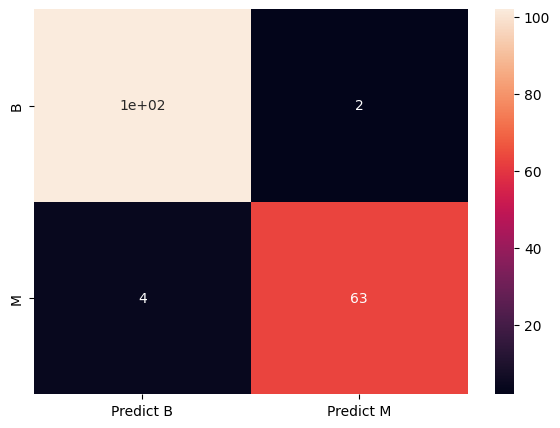

In [68]:
cm_rf_pca =confusion_matrix(y_test, y_pred_rf_pca, labels=['B', 'M'])
print('Confusion Matrix for Random Forest Algorithm After Applying LDA')
print('...'*25)
df_cm_rf_pca = pd.DataFrame(cm_rf_pca, index=[i for i in ['B', 'M']], columns=[i for i in ['Predict B', 'Predict M']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm_rf_pca,annot=True)

## Apply MLP after using LDA

In [69]:
mlp_classifier.fit(X_train_lda, y_train)

MLPClassifier(alpha=0.1, max_iter=1000, random_state=2)

In [70]:
y_pred_mlp_lda = mlp_classifier.predict(X_test_lda)

In [71]:
print('MLP Algorithm Accuracy After Applying LDA is {0:.2g}%'.format(accuracy_score(y_test, y_pred_mlp_lda)*100))
print('...'*25,f'\n')

print('Classification Report for MLP Algorithm After Applying LDA:')
print('...'*25)
cr_mlp_lda = classification_report(y_test, y_pred_mlp_lda)
print(cr_mlp_lda)

MLP Algorithm Accuracy After Applying LDA is 96%
........................................................................... 

Classification Report for MLP Algorithm After Applying LDA:
...........................................................................
              precision    recall  f1-score   support

           B       0.95      0.98      0.97       104
           M       0.97      0.93      0.95        67

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



Confusion Matrix for MLP Algorithm After Applying LDA
...........................................................................


<AxesSubplot: >

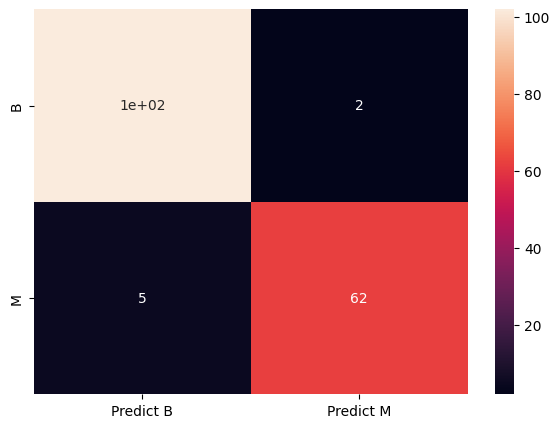

In [72]:
cm_mlp_lda =confusion_matrix(y_test, y_pred_mlp_lda, labels=['B', 'M'])
print('Confusion Matrix for MLP Algorithm After Applying LDA')
print('...'*25)
df_cm_mlp_lda = pd.DataFrame(cm_mlp_lda, index=[i for i in ['B', 'M']], columns=[i for i in ['Predict B', 'Predict M']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm_mlp_lda, annot=True)

## Apply SVM Model after using LDA

In [73]:
svm_classifier.fit(X_train_lda, y_train)

SVC(random_state=1)

In [74]:
y_pred_svm_lda = svm_classifier.predict(X_test_lda)

In [75]:
print('SVM Algorithm Accuracy After Applying LDA is {0:.2g}%'.format(accuracy_score(y_test, y_pred_svm_lda)*100))
print('...'*25,f'\n')

print('Classification Report for SVM Algorithm After Applying LDA:')
print('...'*25)
cr_svm_lda = classification_report(y_test, y_pred_svm_lda)
print(cr_svm_lda)

SVM Algorithm Accuracy After Applying LDA is 97%
........................................................................... 

Classification Report for SVM Algorithm After Applying LDA:
...........................................................................
              precision    recall  f1-score   support

           B       0.95      1.00      0.98       104
           M       1.00      0.93      0.96        67

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



Confusion Matrix for SVM Algorithm After Applying LDA
...........................................................................


<AxesSubplot: >

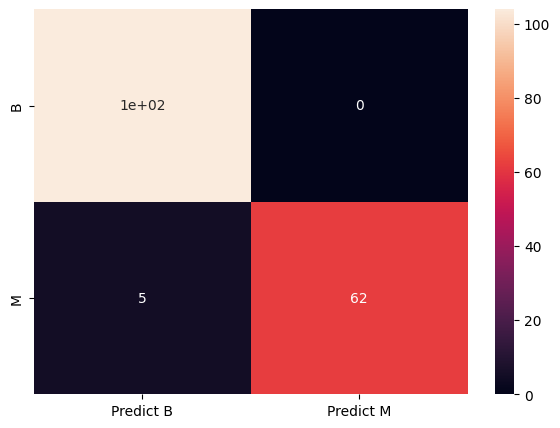

In [76]:
cm_svm_lda =confusion_matrix(y_test, y_pred_svm_lda, labels=['B', 'M'])
print('Confusion Matrix for SVM Algorithm After Applying LDA')
print('...'*25)
df_cm_svm_lda = pd.DataFrame(cm_svm_lda, index=[i for i in ['B', 'M']], columns=[i for i in ['Predict B', 'Predict M']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm_svm_lda, annot=True)

# Comparison of the obtained results for all models in a table format

In [77]:
data = {
        'KNN': 
            [
                '{0:.2g}%'.format(accuracy_score(y_test, y_pred_knn)*100),
                '{0:.2g}%'.format(accuracy_score(y_test, y_pred_knn_pca)*100),
                '{0:.2g}%'.format(accuracy_score(y_test, y_pred_knn_lda)*100)
                ],
        
        'Decision Tree': 
            [
                '{0:.2g}%'.format(accuracy_score(y_test, y_pred_dt)*100),
                '{0:.2g}%'.format(accuracy_score(y_test, y_pred_dt_pca)*100),
                '{0:.2g}%'.format(accuracy_score(y_test, y_pred_dt_lda)*100),
                ],
    
        'Random Forest': 
            [
                '{0:.2g}%'.format(accuracy_score(y_test, y_pred_rf)*100),
                '{0:.2g}%'.format(accuracy_score(y_test, y_pred_rf_pca)*100),
                '{0:.2g}%'.format(accuracy_score(y_test, y_pred_rf_lda)*100),
                ],
    
        'MLP': 
            [
                '{0:.2g}%'.format(accuracy_score(y_test, y_pred_mlp)*100),
                '{0:.2g}%'.format(accuracy_score(y_test, y_pred_mlp_pca)*100),
                '{0:.2g}%'.format(accuracy_score(y_test, y_pred_mlp_lda)*100),
                ],
    
        'SVM': 
            [
                '{0:.2g}%'.format(accuracy_score(y_test, y_pred_svm)*100),
                '{0:.2g}%'.format(accuracy_score(y_test, y_pred_svm_pca)*100),
                '{0:.2g}%'.format(accuracy_score(y_test, y_pred_svm_lda)*100),
                ]}

# create a pandas dataframe from the dictionary
summary = pd.DataFrame(data, index=['Original', 'PCA', 'LDA'])


In [80]:
summary.transpose()

,Original,PCA,LDA
KNN,98%,97%,95%
Decision Tree,92%,94%,94%
Random Forest,95%,96%,94%
MLP,96%,95%,96%
SVM,98%,96%,97%
